In [1]:
%run Load_Data.ipynb import *
from Process_Features import *

In [2]:
data = CH3
resp_Dataframe = Process_RESP(data,fs,16)

In [3]:
resp_Dataframe

,Mean_RSP_Rate,Minimum_RSP_Rate,Maximum_RSP_Rate,STD_RSP_Rate,Mean_RSP_Amplitude,Minimum_RSP_Amplitude,Maximum_RSP_Amplitude,STD_RSP_Amplitude,RRV_RMSSD,RRV_MeanBB,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,15.061952,5.178217,28.328612,3.128705,0.417707,0.025374,1.757952,0.274879,1274.812248,4108.469725,...,27.569983,NaN,NaN,902.257959,1241.163606,1.375619,1.250607,1.353714,0.790925,0.715396


In [2]:
resp = np.array(CH3)
resp = resp.astype(float)
time=np.array(bsnb.generate_time(resp,fs))

In [3]:
len(CH3)

2249248

In [4]:
signals,info = nk.rsp_process(resp,fs,method='biosppy')
signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0,1.07094,-0.047878,1.196302,14.927213,NaN,0.0,0,0
1,1.06645,-0.047769,1.196302,14.927213,NaN,0.0,0,0
2,1.07098,-0.047659,1.196302,14.927213,NaN,0.0,0,0
3,1.06824,-0.047550,1.196302,14.927213,NaN,0.0,0,0
4,1.07135,-0.047440,1.196302,14.927213,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
2249243,1.64095,0.000008,0.189168,19.292605,NaN,0.0,0,0
2249244,1.63687,0.000008,0.189168,19.292605,NaN,0.0,0,0
2249245,1.64447,0.000008,0.189168,19.292605,NaN,0.0,0,0
2249246,1.64557,0.000008,0.189168,19.292605,NaN,0.0,0,0


In [5]:
np.mean(signals["RSP_Rate"])

15.061951940073694

In [6]:
info,peak_signals = nk.rsp_peaks(signals["RSP_Clean"])

In [7]:
rrv_dataframe = nk.rsp_rrv(signals["RSP_Rate"],peaks=peak_signals["RSP_Troughs"])
rrv_dataframe

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_NN50,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,1274.812248,4108.469725,1085.024544,1275.985443,0.264095,0.310289,3859.0,619.7268,0.160593,493.0,...,27.569983,NaN,NaN,902.257959,1241.163606,1.375619,1.250607,1.353714,0.790925,0.715396


In [13]:
rrv_dataframe.insert(0,"AVG Resp Rate",np.mean(signals["RSP_Rate"]),True)
rrv_dataframe.insert(0,"Min Resp Rate",np.mean(signals["RSP_Rate"]),True)
rrv_dataframe

,Min Resp Rate,AVG Resp Rate,AVG Resp Rate,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,...,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2,AVG Rate
0,15.061952,15.061952,15.061952,1274.812248,4108.469725,1085.024544,1275.985443,0.264095,0.310289,3859.0,...,NaN,NaN,902.257959,1241.163606,1.375619,1.250607,1.353714,0.790925,0.715396,15.061952


In [8]:
rrv_dataframe.columns

Index(['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB',
       'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_NN50',
       'RRV_NN20', 'RRV_pNN50', 'RRV_pNN20', 'RRV_VLF', 'RRV_LF', 'RRV_HF',
       'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1',
       'RRV_ApEn', 'RRV_SampEn', 'RRV_DFA_1', 'RRV_DFA_2'],
      dtype='object')

Using matplotlib backend: Qt5Agg


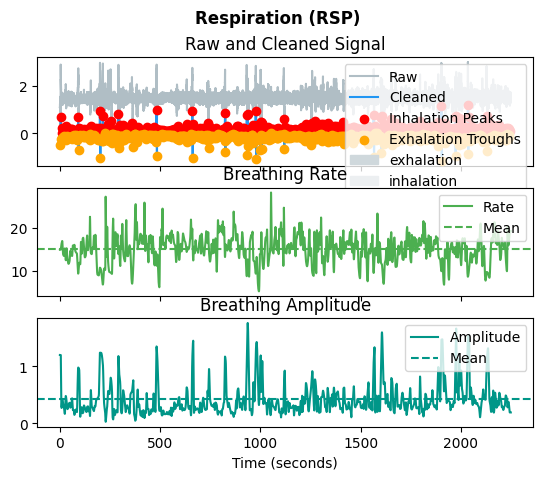

In [9]:
%matplotlib
nk.rsp_plot(signals,fs)